# Import

In [4]:
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kt

# Loading Data

In [5]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

# Base Model

In [6]:
def model_builder():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(units=512, activation='relu'))
  model.add(keras.layers.Dense(10))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [7]:
model = model_builder()
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)


Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5458 - accuracy: 0.8065 - val_loss: 0.4780 - val_accuracy: 0.8391
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4394 - accuracy: 0.8441 - val_loss: 0.4587 - val_accuracy: 0.8339
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4165 - accuracy: 0.8503 - val_loss: 0.4697 - val_accuracy: 0.8347
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3981 - accuracy: 0.8565 - val_loss: 0.4065 - val_accuracy: 0.8601
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3844 - accuracy: 0.8606 - val_loss: 0.4191 - val_accuracy: 0.8583
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3814 - accuracy: 0.8631 - val_loss: 0.4483 - val_accuracy: 0.8493
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8648 - val_loss: 0.4159 - val_accuracy:

# Keras Tuner

In [8]:
def build_tuner_model(hp):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(hp.Int('dense_units', min_value=16, max_value=512, step=16)))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(keras.layers.Dense(10))
  learning_rate = hp.Choice('learning_rate', values=[0.01, 0.005, 0.001, 0.0005, 0.0001])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [17]:
from matplotlib import pyplot as plt


def plot_loss(history, title):
  trianing_loss = history.history['loss']
  validation_loss = history.history['val_loss']
  plt.plot(trianing_loss, label='Training loss')
  plt.plot(validation_loss, label='Validation loss')
  plt.title(title)
  plt.legend(['train', 'validation'])
  plt.figure()
  plt.show()

def plot_acc(history, title):
  trian_acc = history.history['accuracy']
  validation_acc = history.history['val_accuracy']
  plt.plot(trian_acc, label='Training acc')
  plt.plot(validation_acc, label='Validation acc')
  plt.title(title)
  plt.legend(['train', 'validation'])
  plt.figure()
  plt.show()

In [10]:
from kerastuner.tuners import Hyperband

tuner = Hyperband(
  build_tuner_model,
  objective='val_accuracy',
  max_epochs=5,
  executions_per_trial=5,
)

epochs_num = 10

tuner.search(img_train, label_train, epochs=epochs_num, validation_split=0.2)

print(tuner.get_best_models()[0].summary())
print(tuner.get_best_hyperparameters()[0].values)

Trial 10 Complete [00h 02m 59s]
val_accuracy: 0.8650833249092102

Best val_accuracy So Far: 0.8840999960899353
Total elapsed time: 00h 17m 30s
INFO:tensorflow:Oracle triggered exit
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 320)               251200    
                                                                 
 activation (Activation)     (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                3210      
                                                                 
Total params: 254,410
Trainable params: 254,410
Non-trainable params: 0
_________________________________________________________________
N

In [11]:
model = tuner.get_best_models(num_models=1)[0]
print(model.summary())

model.save('tuner_model.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 320)               251200    
                                                                 
 activation (Activation)     (None, 320)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                3210      
                                                                 
Total params: 254,410
Trainable params: 254,410
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
def model_builder():
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(units=416, activation='relu'))
  model.add(keras.layers.Dense(10))
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [13]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
dense_units: 320
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8840999960899353
Trial summary
Hyperparameters:
dense_units: 368
learning_rate: 0.0005
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 11caf851a30c963e2ca3f777fb425c3f
Score: 0.8733000040054322
Trial summary
Hyperparameters:
dense_units: 336
learning_rate: 0.001
tuner/epochs: 5
tuner/initial_epoch: 2
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 7d0decbb11981a21379a9895e4156ffb
Score: 0.8715666651725769
Trial summary
Hyperparameters:
dense_units: 288
learning_rate: 0.0001
tuner/epochs: 5
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.8684666752815247
Trial summary
Hyperparameters:
dense_units: 336
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/brack

In [14]:
model = model_builder()
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5102 - accuracy: 0.8217 - val_loss: 0.4286 - val_accuracy: 0.8457
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3815 - accuracy: 0.8632 - val_loss: 0.3660 - val_accuracy: 0.8690
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3381 - accuracy: 0.8779 - val_loss: 0.3637 - val_accuracy: 0.8725
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3101 - accuracy: 0.8865 - val_loss: 0.3276 - val_accuracy: 0.8811
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2916 - accuracy: 0.8938 - val_loss: 0.3302 - val_accuracy: 0.8827
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.8982 - val_loss: 0.3272 - val_accuracy: 0.8792
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2600 - accuracy: 0.9038 - val_loss: 0.3153 - val_accuracy:

In [15]:
loss, accuracy = model.evaluate(img_test, label_test)
print('loss:', loss)
print('accuracy:', accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.5270 - accuracy: 0.8877
loss: 0.5270094275474548
accuracy: 0.8877000212669373


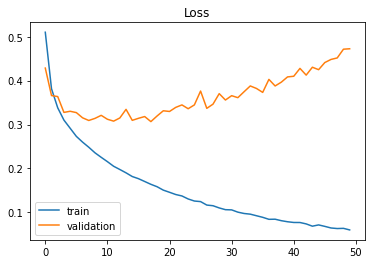

<Figure size 432x288 with 0 Axes>

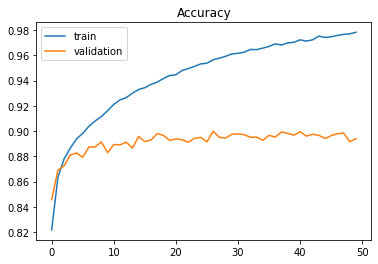

<Figure size 432x288 with 0 Axes>

In [18]:
plot_loss(history,"Loss")
plot_acc(history,"Accuracy")